# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2054 images belonging to 2 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
training_set.class_indices

{'foriegners': 0, 'indians': 1}

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

# 1st dense layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 2nd dense layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50
16/65 [======>.......................] - ETA: 7:52 - loss: 0.6915 - accuracy: 0.5586

KeyboardInterrupt: ignored

## Part 4 - Making a single prediction

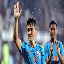

In [31]:
import numpy as np
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/single_prediction/chhetri.jpg', target_size = (64, 64))
test_image

In [ ]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] == 0:
  prediction = "None"
elif result[0][0] <= 0.5:
  prediction = 'Foreigner'
else:
  prediction = 'Indian'

In [ ]:
print(prediction)

In [ ]:
print(result[0][0])

# saving the model

In [ ]:
cnn.save("cnn.dense4_conv4")
print("Saved model to disk")

# loading the model

In [18]:
from numpy import loadtxt
from keras.models import load_model


# load model
cnn = load_model('/content/drive/MyDrive/human image classifier/Human Image Classifier/cnn.indian_or_not')
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


In [26]:
import numpy as np

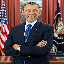

In [25]:
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/single_prediction/obama.jpg', target_size = (64, 64))
test_image

In [28]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.5:
  prediction = 'Foreigner'
else:
  prediction = 'Indian'

1/1 [==============================] - 0s 166ms/step


In [29]:
print(prediction)

Foreigner


In [30]:
result[0][0]

0.49544674

In [ ]:
import shutil, os
#files = ['file1.txt', 'file2.txt', 'file3.txt']
#for f in files:
    #shutil.move(f, 'dest_folder')

In [ ]:
import os
directory = '/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/single_prediction'
indian = 0
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
      path = os.path.join(directory, filename)
      test_image = image.load_img(path, target_size = (64, 64))
      test_image = image.img_to_array(test_image)
      test_image = np.expand_dims(test_image, axis = 0)
      result = cnn.predict(test_image/255.0)
      #training_set.class_indices
      if result[0][0] <= 0.4:
          prediction = 'Foreigner'
          shutil.move(path,r'/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/Batch_prediction_output/non indian')
          
      else:
          prediction = 'Indian'
          shutil.move(path,r'/content/drive/MyDrive/human image classifier/Human Image Classifier/dataset/Batch_prediction_output/non indianindian')
          indian += 1
          if indian < 1000:
            break
    
    else:
      continue
    print(prediction)